In [1]:
import pandas as pd

movie=pd.read_csv("nlp2_data",encoding = 'utf_8_sig')
movie.head()


,Unnamed: 0,電影名稱,類型,上映時間,劇情介紹
0,0,一世狂野 Blow,劇情、犯罪、歷史/傳記,上映日期：2001-10-12,\n 喬治戎格一生都在追求所謂的美國夢，也就是享受美好富裕的生活，但是...
1,1,玩命關頭 The Fast and the Furious,動作、劇情、犯罪、懸疑/驚悚,上映日期：2001-10-13,\n 唐米尼杜洛托是洛城街頭賽車界的老大哥，他身邊有一群忠心耿耿的手下...
2,2,戰雲密佈 Storm Catcher,動作、犯罪、懸疑/驚悚、戰爭,上映日期：2001-10-13,\n 美國空軍最高機密的隱形戰機驚傳失蹤！祕密訓練的飛行軍官傑克，被誣...
3,3,騎士風雲錄 A Knight's Tale,動作、冒險、喜劇,上映日期：2001-10-19,\n 14世紀中古時期的社會階級分明，出身卑微的平民不論如何努力和奮鬥...
4,4,金法尤物 Legally Blonde,喜劇,上映日期：2001-10-19,\n 在【歡樂谷】、【危險性遊戲】挑大樑的瑞絲薇斯朋飾演【金法尤物】中...


In [2]:
#修改類型
for i in range(0,6000):
    type=''
    if str(movie['類型'][i])=='nan':
        movie['類型'][i]='NA'
        continue
    for k in movie['類型'][i]:
        if str(k) !='、':
            type=type+str(k)
        else:
            break
    movie['類型'][i]=type




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20882 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38570 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21916 missing from c

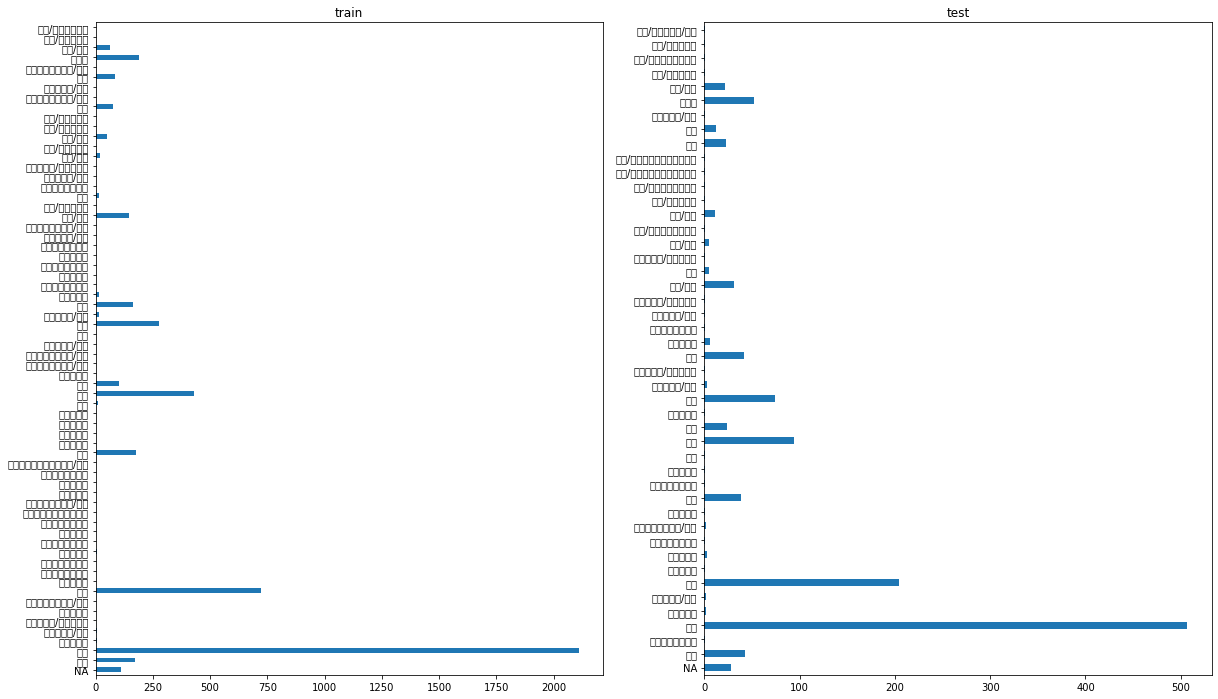

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train,test= train_test_split(movie,test_size=0.2)
plt.figure( figsize = (20,12))
plt.subplot(1,2,1)
train["類型"].value_counts().sort_index().plot( kind = "barh", title = "train")
plt.subplot(1,2,2)
test["類型"].value_counts().sort_index().plot( kind = "barh", title = "test")

In [4]:
#處理劇情
import jieba
import jieba.analyse

def jieba_story(story):
    story.replace("\n","").replace("！","").replace("","，").replace("．","").replace("、","").replace("【","").replace("】","「").replace("」","").replace("（","").replace("）","").replace("★","").replace("\r\n","")
    return " ".join(list(jieba.analyse.extract_tags(story,topK=2)))

In [5]:
#df1
movie["jieba_story"]=movie["劇情介紹"].map(jieba_story)
movie_df1={'type':movie['類型'],'story':movie['jieba_story']}
df1=pd.DataFrame(movie_df1)
df1['key'] = df1['type'].astype(str)+' '+df1['story'].astype(str)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/h8/xtnqvm910v943k55rmpn3xj40000gn/T/jieba.cache
Loading model cost 0.891 seconds.
Prefix dict has been built succesfully.


In [8]:
df1_comp=df1[0:6000]
df1_comp

,type,story,key
0,劇情,喬治 販毒,劇情 喬治 販毒
1,動作,老大 布萊恩,動作 老大 布萊恩
2,動作,戰機 傑克,動作 戰機 傑克
3,動作,貴族 騎士,動作 貴族 騎士
4,喜劇,哈佛 入學,喜劇 哈佛 入學
...,...,...,...
5995,劇情,影展 兒子,劇情 影展 兒子
5996,NA,日本 田正浩,NA 日本 田正浩
5997,劇情,法國 30,劇情 法國 30
5998,動畫,迪南 爆笑,動畫 迪南 爆笑


In [17]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier


def count(df):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['key'])
    tfidf = TfidfTransformer() 
    tf=tfidf.fit_transform(X)
    word = vectorizer.get_feature_names() 
    
    return tf

def knn(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X,Y['type'].str[0:2],test_size=0.2)
    clf=KNeighborsClassifier(n_neighbors=55)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    y_test=y_test.values

    print("精準度：",metrics.accuracy_score(y_test, y_pred))

tf = count(df1_comp)
knn(tf,df1_comp)

精準度： 0.9366666666666666
